In [485]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [486]:
df=pd.read_csv('merge_video_game.csv',
               index_col = 0)

## simple exploratory data analysis(EDA)

In [487]:
df.describe()

,year,rate,votes,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,400.000000,400.000000,400.00000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,2010.690000,8.361500,10301.84750,3300.448276,1.188498,0.775369,0.067291,0.294064,2.325493
std,4.482648,0.743539,9602.18746,3820.563391,1.731449,1.083115,0.185191,0.663309,3.225921
min,1997.000000,6.400000,536.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2008.000000,8.000000,4105.25000,455.000000,0.170000,0.130000,0.000000,0.040000,0.430000
50%,2012.000000,8.400000,6951.00000,1891.500000,0.555000,0.400000,0.000000,0.110000,1.085000
75%,2014.000000,8.925000,14673.00000,4508.500000,1.407500,0.977500,0.060000,0.310000,3.070000
max,2023.000000,9.700000,55776.00000,16375.000000,9.670000,9.270000,2.020000,10.570000,21.400000


In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          406 non-null    object 
 1   year          400 non-null    float64
 2   game_type     406 non-null    object 
 3   rate          400 non-null    float64
 4   votes         400 non-null    float64
 5   Rank          406 non-null    int64  
 6   Platform      406 non-null    object 
 7   NA_Sales      406 non-null    float64
 8   EU_Sales      406 non-null    float64
 9   JP_Sales      406 non-null    float64
 10  Other_Sales   406 non-null    float64
 11  Global_Sales  406 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 41.2+ KB


In [489]:
df.isna().sum()

Name            0
year            6
game_type       0
rate            6
votes           6
Rank            0
Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [490]:
#df.dropna(inplace=True)
df = df.fillna(df.mean())

In [491]:
df.isna().sum()

Name            0
year            0
game_type       0
rate            0
votes           0
Rank            0
Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          406 non-null    object 
 1   year          406 non-null    float64
 2   game_type     406 non-null    object 
 3   rate          406 non-null    float64
 4   votes         406 non-null    float64
 5   Rank          406 non-null    int64  
 6   Platform      406 non-null    object 
 7   NA_Sales      406 non-null    float64
 8   EU_Sales      406 non-null    float64
 9   JP_Sales      406 non-null    float64
 10  Other_Sales   406 non-null    float64
 11  Global_Sales  406 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 41.2+ KB


## Visualization Data


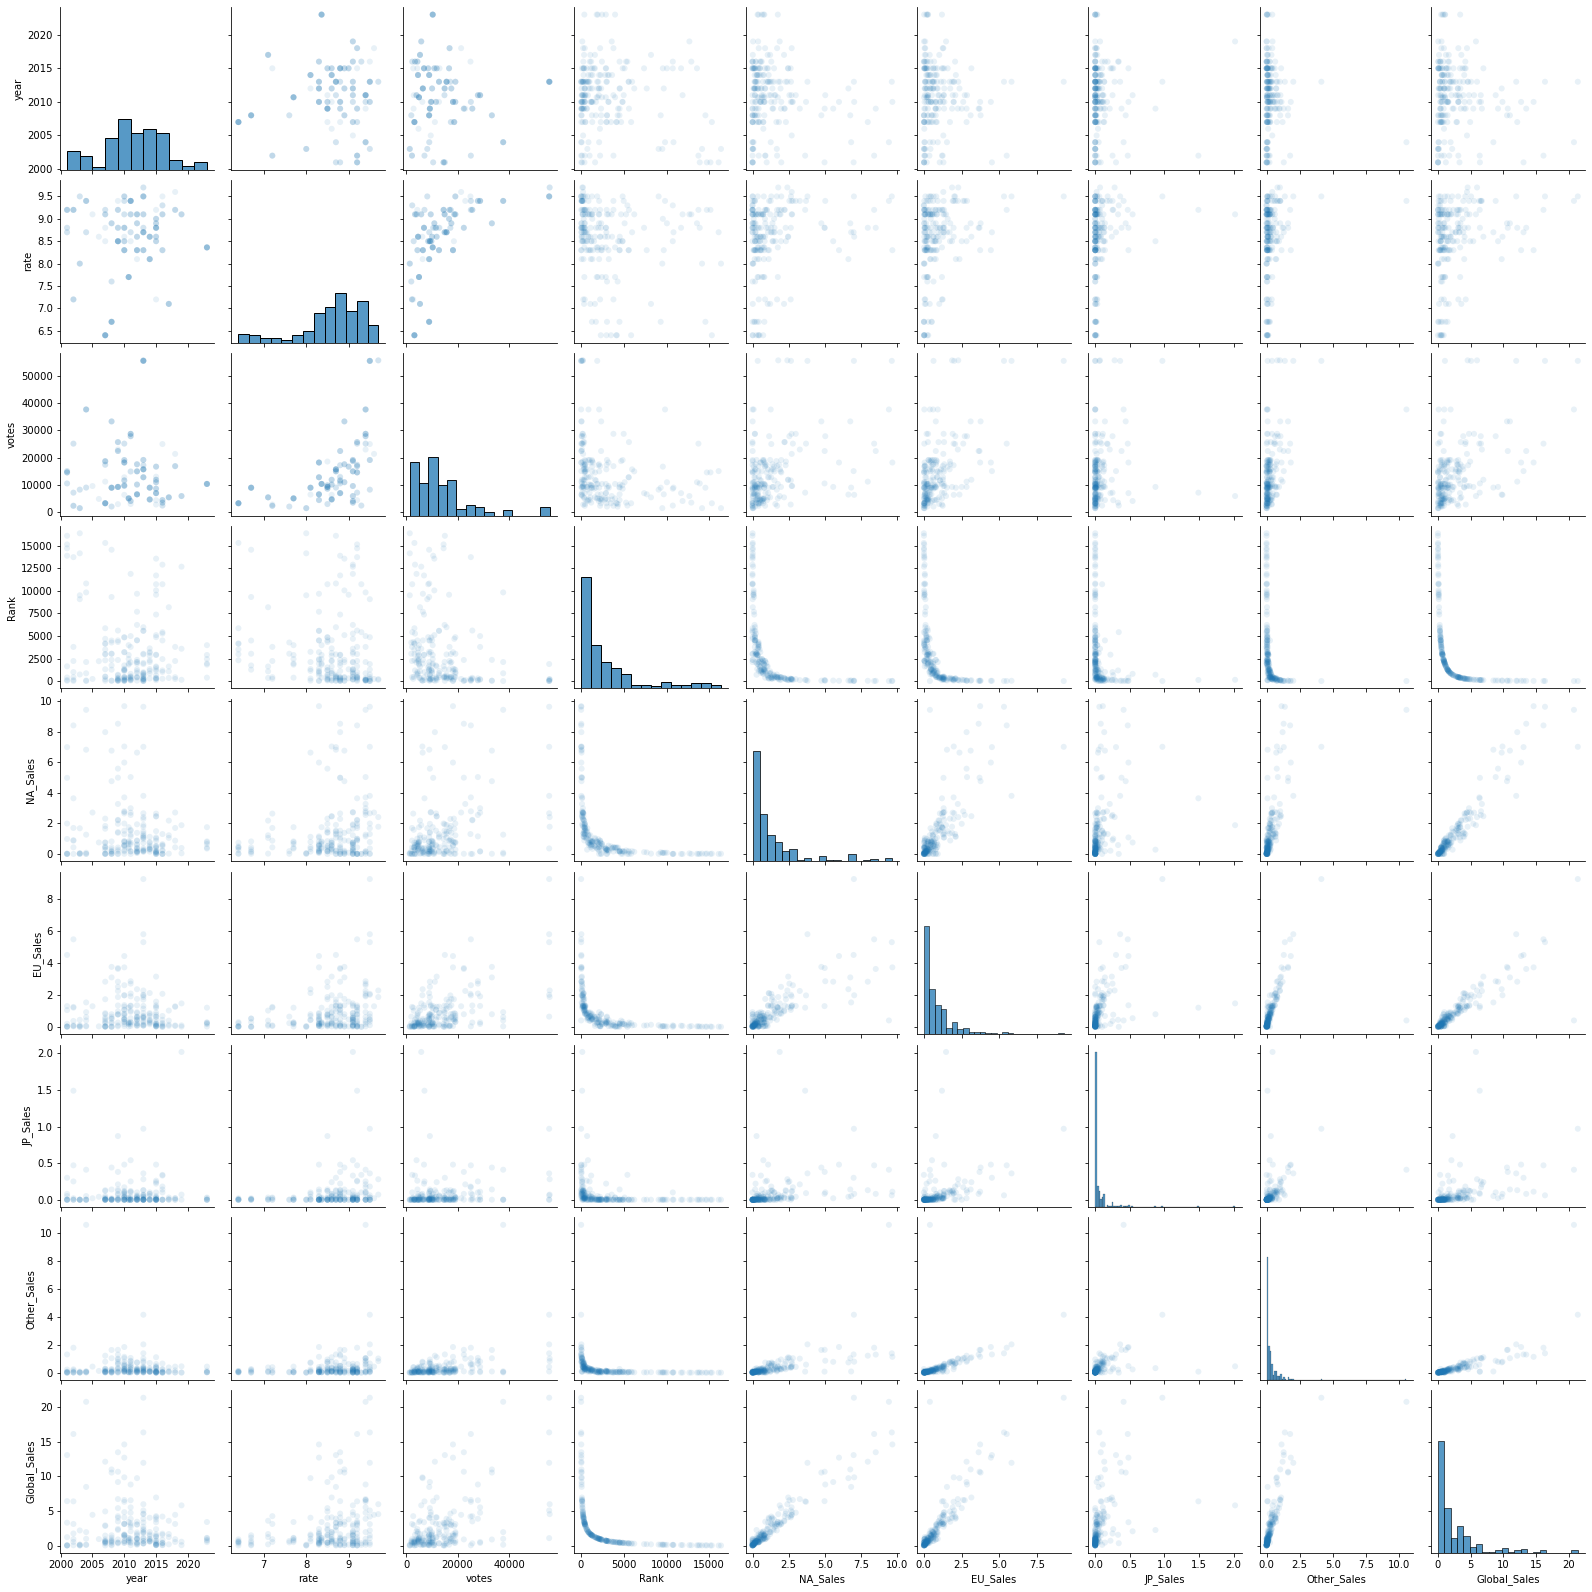

In [145]:
sns.pairplot(df[:200], plot_kws=dict(alpha=.1, edgecolor='none'))

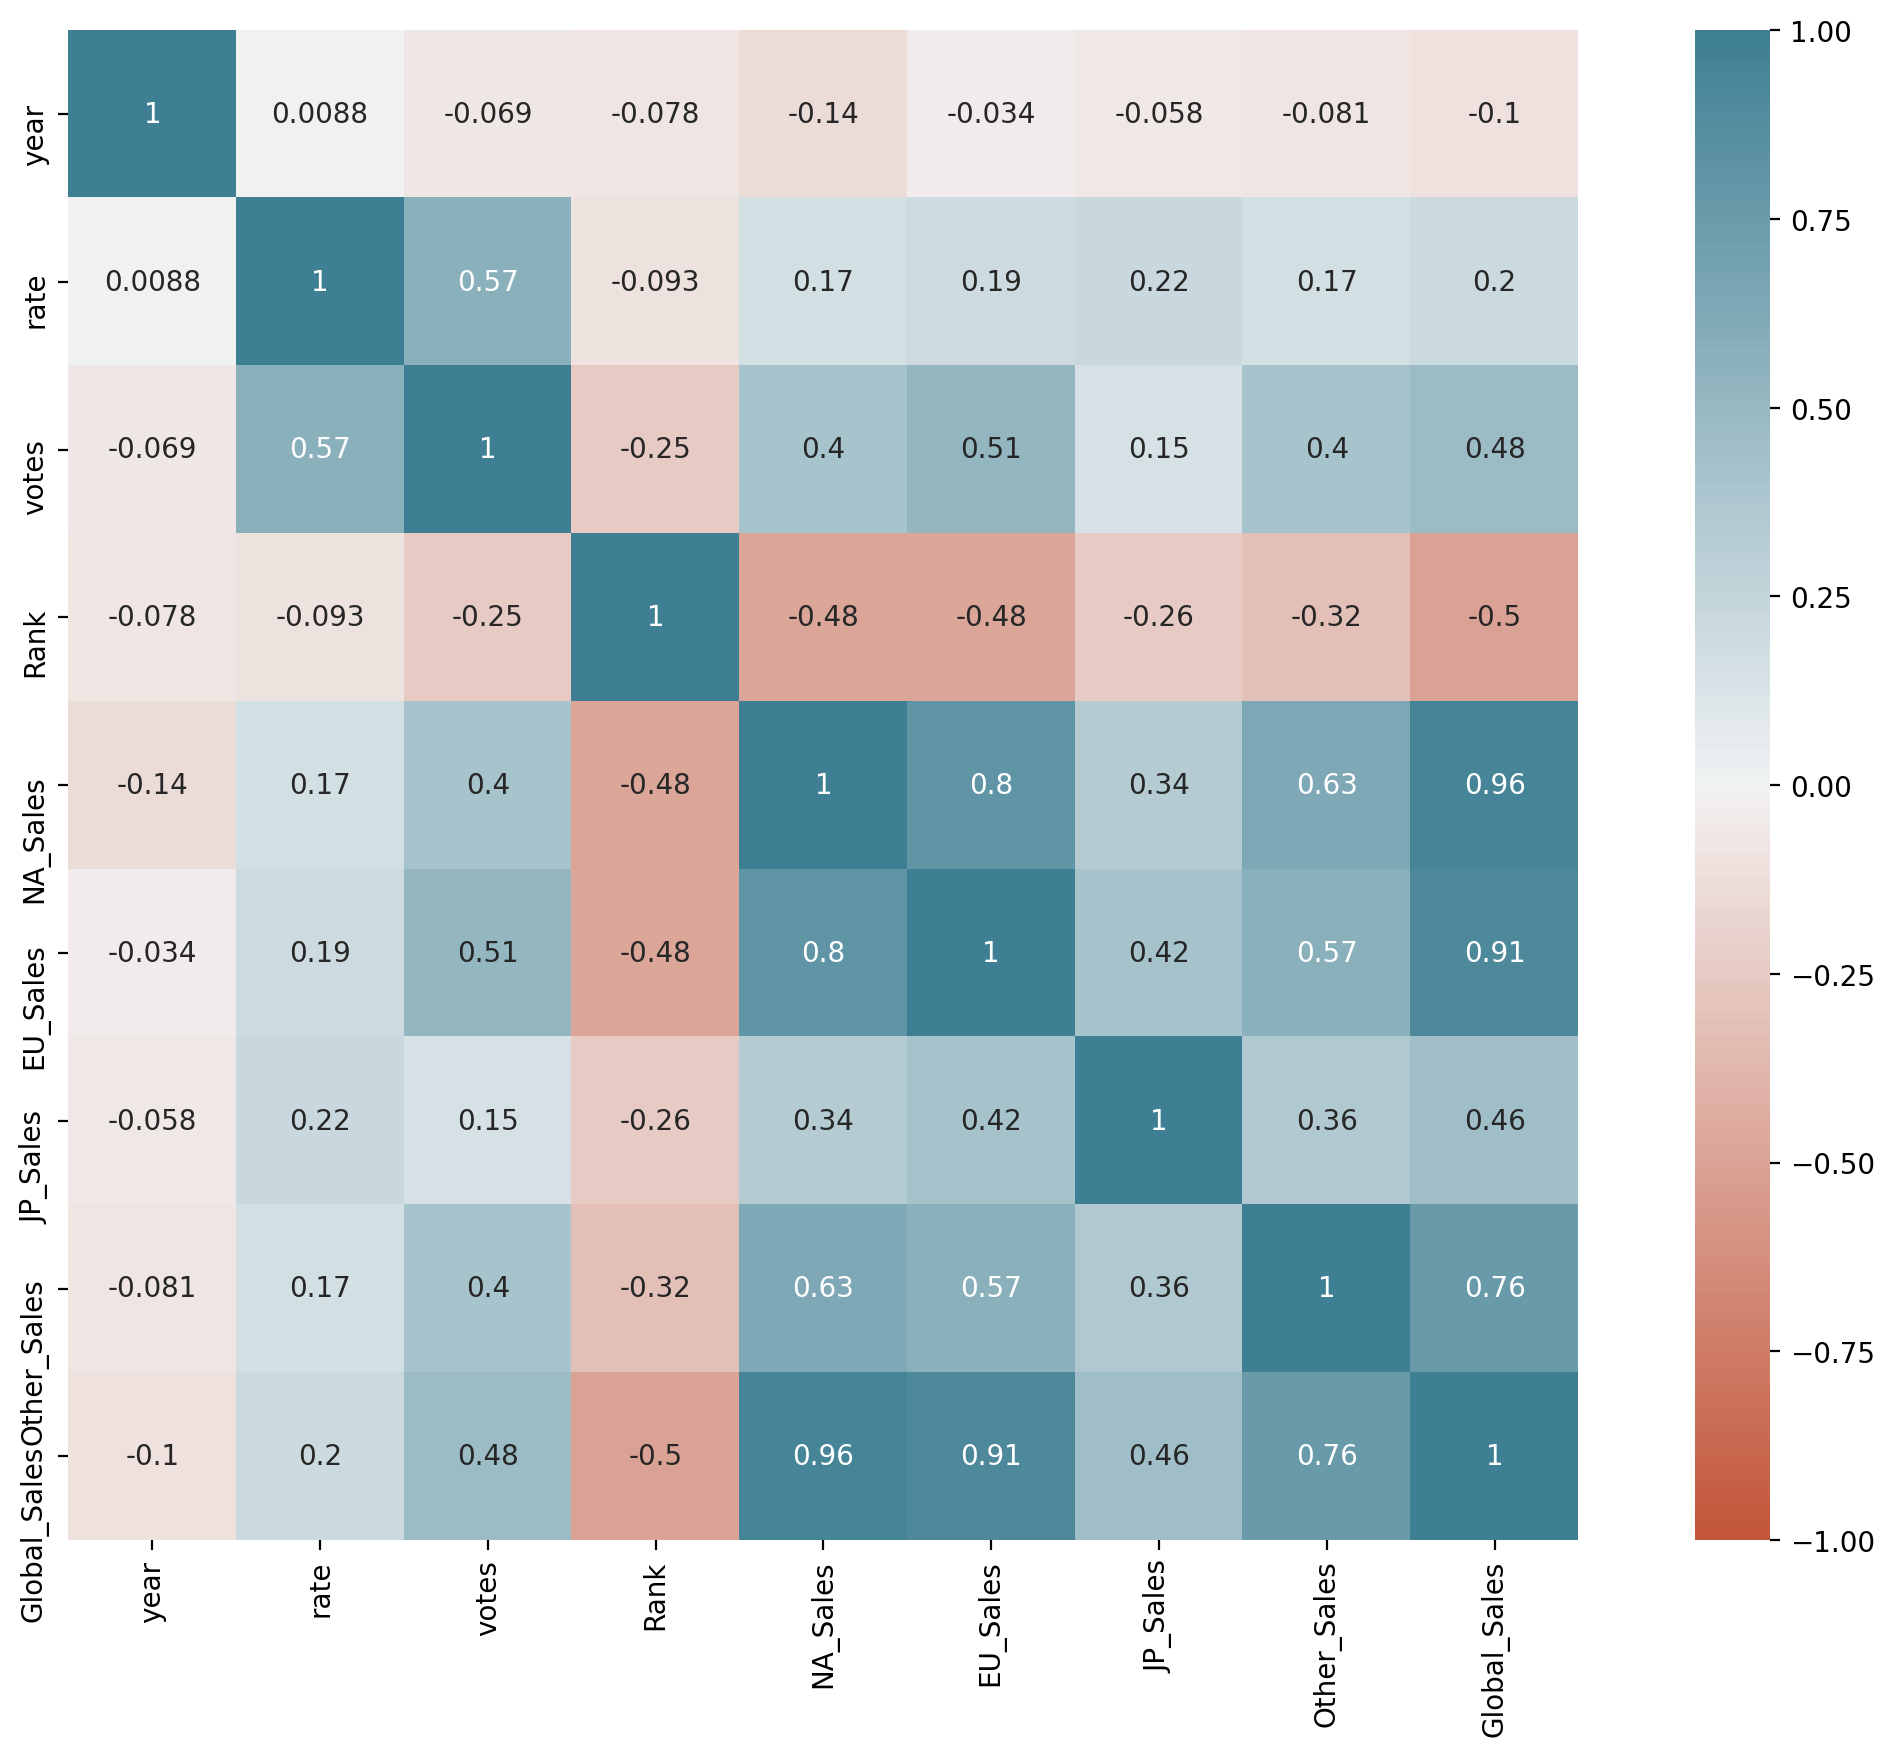

In [376]:
plt.figure(figsize=(15,10),dpi=200),
sns.heatmap(df.corr(),square=True, annot=True, vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, n=200),);


# linear regression

### determine the features and target

In [524]:
#cols = ['year','rate','votes','Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
cols=['JP_Sales','Other_Sales']
x = df[cols]
y = df.Global_Sales

### split data to train and val and test

In [525]:
# hold out 20% of the data for final testing
x, X_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state= 0)

In [526]:
print("Training Data has",X_train.shape)
print('Test Data has',X_test.shape)
print("Validation Data has",X_val.shape)

Training Data has (259, 2)
Test Data has (82, 2)
Validation Data has (65, 2)


In [527]:
lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()


# baseline model

In [528]:

lm.fit(X_train, y_train)
print(f'linear regression train R^2: {lm.score(X_train, y_train):.3f}')
lm.fit(X_val,y_val)
print(f'linear Regression val R^2: {lm.score(X_val, y_val):.3f}')


linear regression train R^2: 0.544
linear Regression val R^2: 0.864


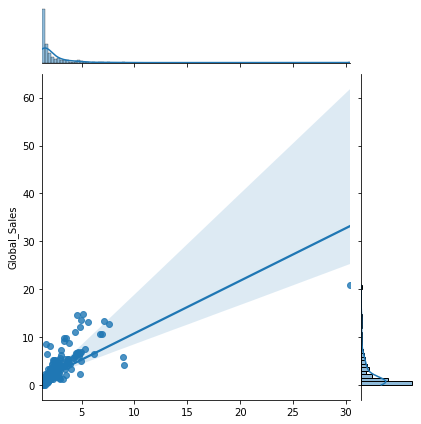

In [529]:
lm.fit(X_train, y_train)
preds = lm.predict(x)
sns.jointplot(x=preds,y=y, kind='reg')


# exp1 (feature engenering-dummy varibales model)

In [530]:
df['Platform'].nunique()

19

In [531]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    # perform train/val split
    X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=0.2, random_state=0)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print(f'dummy train R^2: {lr_model.score(X_train, y_train):.3f}')

    print('\nValidation R^2 score was:', val_score)
    



In [532]:
X1 = x.copy()

X1['Platform_d'] = df['Platform']

split_and_validate(pd.get_dummies(X1), y)

dummy train R^2: 0.635

Validation R^2 score was: 0.6327492097961972


# exp2 (Standered Scale model)

In [533]:

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
lm.fit(X_val_scaled,y_val)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')



Ridge Regression train R^2: 0.544
Ridge Regression val R^2: 0.588


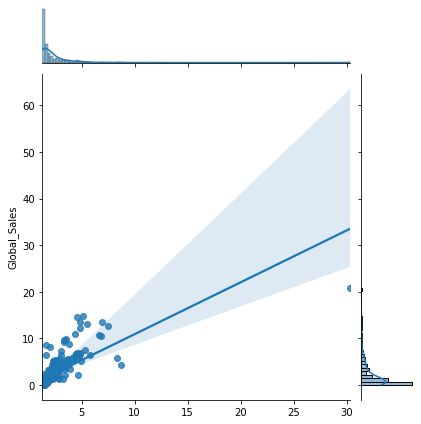

In [534]:

lm_reg.fit(X_train, y_train)
preds = lm_reg.predict(x)
sns.jointplot(x=preds,y=y, kind='reg')

# exp3 (polynomial model)

In [538]:
#exp2 (poly on X)
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
lm.fit(X_val_poly,y_val)
print(f'Degree Regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Degree 2 polynomial regression train R^2: 0.811
Degree Regression val R^2: 0.846


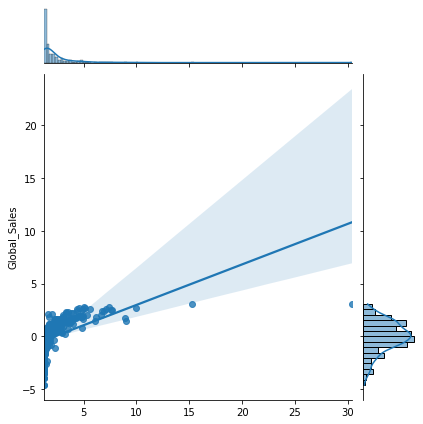

In [539]:

lm_poly.fit(X_train, y_train)
preds = lm_poly.predict(x)
sns.jointplot(x=preds,y=y, kind='reg')


In [542]:
#cols = ['year','rate','votes','Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
cols=['JP_Sales','Other_Sales']
x = df[cols]
y = np.log(df.Global_Sales)

In [543]:
lm.fit(X_train, y_train)
print(f'linear regression train R^2: {lm.score(X_train, y_train):.3f}')
lm.fit(X_val,y_val)
print(f'linear Regression val R^2: {lm.score(X_val, y_val):.3f}')


linear regression train R^2: 0.544
linear Regression val R^2: 0.864


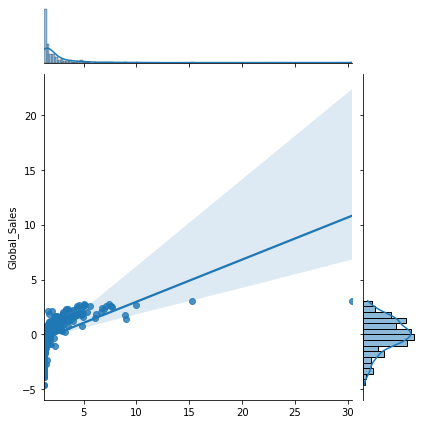

In [544]:

lm.fit(X_train, y_train)
preds = lm.predict(x)
sns.jointplot(x=preds,y=y, kind='reg')

In [298]:
#lm.fit(x,y)
#print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

## beast model (polynomial model)

In [299]:
model = sm.OLS(y_train,X_train_poly)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     216.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.59e-89
Time:                        12:06:10   Log-Likelihood:                -428.79
No. Observations:                 259   AIC:                             869.6
Df Residuals:                     253   BIC:                             890.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1458      0.106      1.375      0.170      -0.063       0.354
x1             2.7914      1.206      2.315      0.021       0.416       5.166
x2             8.7431      0.376     23.270      0.000       8.003       9.483
x3             0.8337      0.700      1.192      0.234      -0.544       2.211
x4            -7.8161      1.042     -7.499      0.000      -9.869      -5.764
x5            -0.3499      0.039     -8.934      0.000      -0.427      -0.273
==============================================================================
Omnibus:                      154.608   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1528.863
Skew:                           2.214   Prob(JB):                         0.00
Kurtosis:                      14.048   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  evaluate model performance using  RMSE and MAE to determine errors


In [300]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, preds, squared=False)
mae = mean_absolute_error(y, preds)

In [301]:
print(rmse)
print(mae)

1.9582880381414989
1.2273381778224328


In [546]:
# Calculate and print r2_score

y_pred=lm_poly.predict(X_test)
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.6547


## lasso and ridge 

In [362]:
cols = ['year','rate','votes','Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
#cols=['JP_Sales','Other_Sales']
x = df[cols]
y = df.Global_Sales

In [363]:
# hold out 20% of the data for final testing
x, X_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state= 0)

In [364]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
lasso_model = Lasso(alpha = .1) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train.loc[:,cols], y_train)

Lasso(alpha=0.1)

In [365]:
coef=lasso_model.coef_
list(zip(cols, coef))

[('year', -0.0),
 ('rate', 0.0),
 ('votes', 1.1542011728203045e-05),
 ('Rank', -2.8084181814764234e-05),
 ('NA_Sales', 1.11404471310872),
 ('EU_Sales', 0.7356980581139289),
 ('JP_Sales', 0.0),
 ('Other_Sales', 0.7545056722688559)]

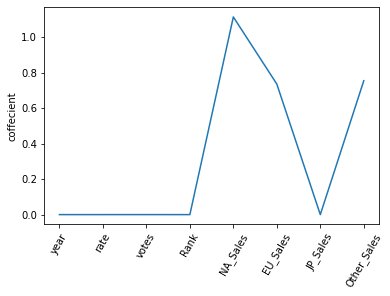

In [366]:
coef=lasso_model.coef_
plt.plot(range(len(cols)),coef)
plt.xticks(range(len(cols)),cols,rotation=60)
plt.ylabel('coffecient')
plt.show()

In [367]:
test_set_pred = lasso_model.predict(X_test.loc[:,cols])

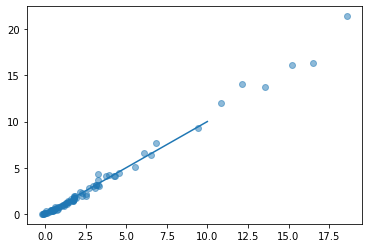

In [368]:
plt.scatter(test_set_pred, y_test, alpha=.5)
plt.plot(np.linspace(0,10,5), np.linspace(0,10,5))

In [369]:
#r-squared
r2_score(y_test, test_set_pred)

0.986430439787147

98% correct proves the model is a good model!

In [370]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

0.2519836389909023

In [371]:
lr_model_ridge = Ridge(alpha = 0.1)
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

[('year', 6.702834077541254e-05),
 ('rate', 0.0010809905016333503),
 ('votes', 2.3255049242719933e-08),
 ('Rank', -2.171964567553575e-08),
 ('NA_Sales', 1.0004200797281764),
 ('EU_Sales', 0.9991763871652617),
 ('JP_Sales', 0.9887516545081638),
 ('Other_Sales', 0.999466529274626)]

In [372]:
test_set_pred_r = lr_model_ridge.predict(X_test.loc[:,cols])

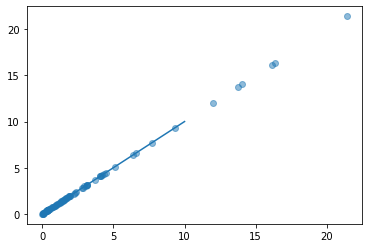

In [373]:
plt.scatter(test_set_pred_r, y_test, alpha=0.5)
plt.plot(np.linspace(0,10,5), np.linspace(0,10,5))

In [374]:
#r-squared
r2_score(y_test, test_set_pred_r)

0.9999972130077969

99% correct proves the model is a good model!

In [375]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred_r)#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred_r)

0.004796482162633798